In [11]:
setwd("F:\\Quantiphi - Modelling problem")
library(data.table)
library(ggplot2)

mdata <- fread("Training Sheet.csv")

mdata <- mdata[,`:=`(id = NULL)]
mdata <- data.frame(mdata)

summary(mdata)

     name           display_name       production_year  movie_sequel    
 Length:1196        Length:1196        Min.   :2007    Min.   :0.00000  
 Class :character   Class :character   1st Qu.:2008    1st Qu.:0.00000  
 Mode  :character   Mode  :character   Median :2009    Median :0.00000  
                                       Mean   :2009    Mean   :0.09783  
                                       3rd Qu.:2010    3rd Qu.:0.00000  
                                       Max.   :2011    Max.   :1.00000  
 creative_type         source          production_method     genre          
 Length:1196        Length:1196        Length:1196        Length:1196       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

In [12]:
#Checking no. of categories in each column
sapply(mdata, function(x) length(unique(x)))


name                       display_name 
                              1196                               1195 
                   production_year                       movie_sequel 
                                 5                                  2 
                     creative_type                             source 
                                 9                                 16 
                 production_method                              genre 
                                 6                                 13 
                          language                board_rating_reason 
                                16                               1003 
   movie_board_rating_display_name movie_release_pattern_display_name 
                                 6                                  7 
                             total                           Category 
                               324                                  9

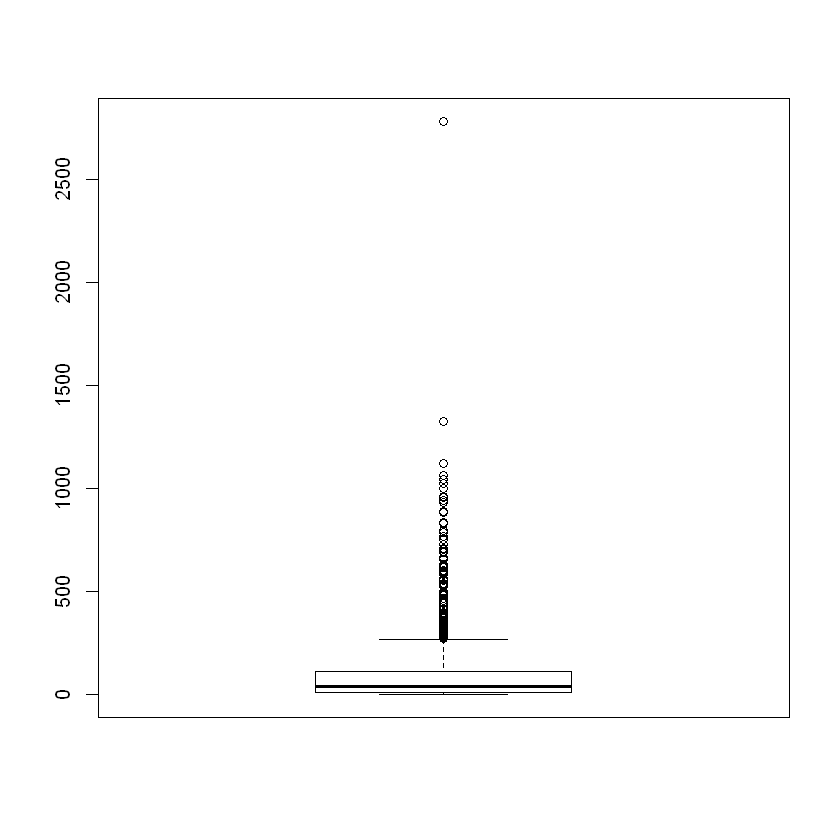

In [13]:
# Checking distribution of total column with box plot
boxplot(mdata$total)

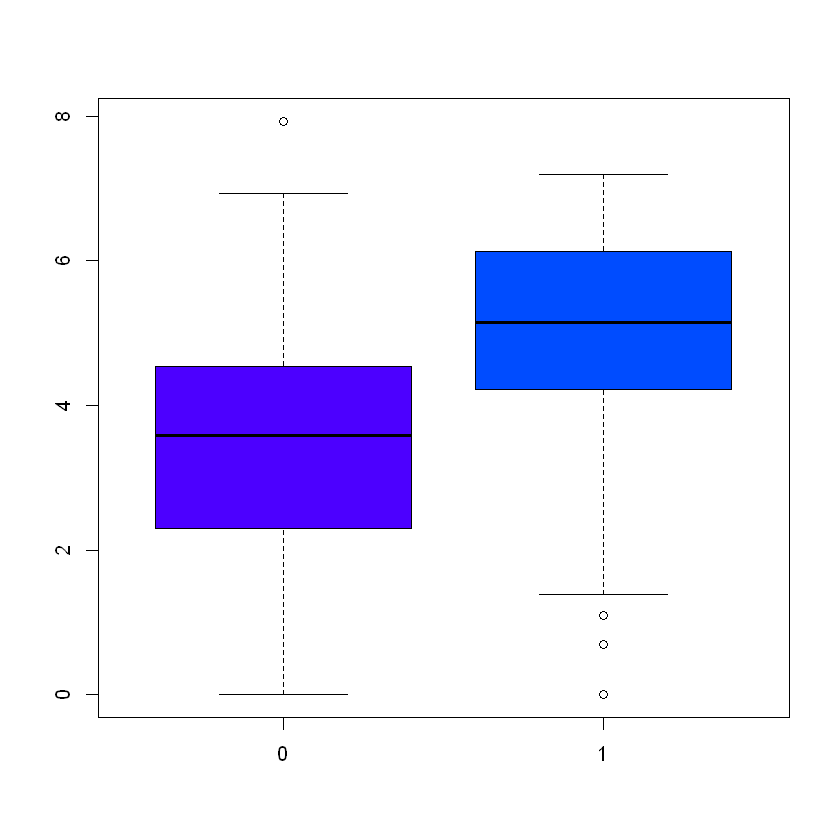

In [7]:
# Taking a log transformation of total column for bivariate analysis is a better choice 
# Because that will enable us to see the bivariate distribution in much clear way

# Testing the hypothesis that movies with sequels tend to earn more than other movies 

boxplot(log(mdata$total) ~ mdata$movie_sequel , col = topo.colors(5))


   Contemporary Fiction           Dramatization                 Factual 
                    638                      95                      60 
                Fantasy      Historical Fiction            Kids Fiction 
                    131                     100                      59 
Multiple Creative Types         Science Fiction              Super Hero 
                      4                      89                      20 

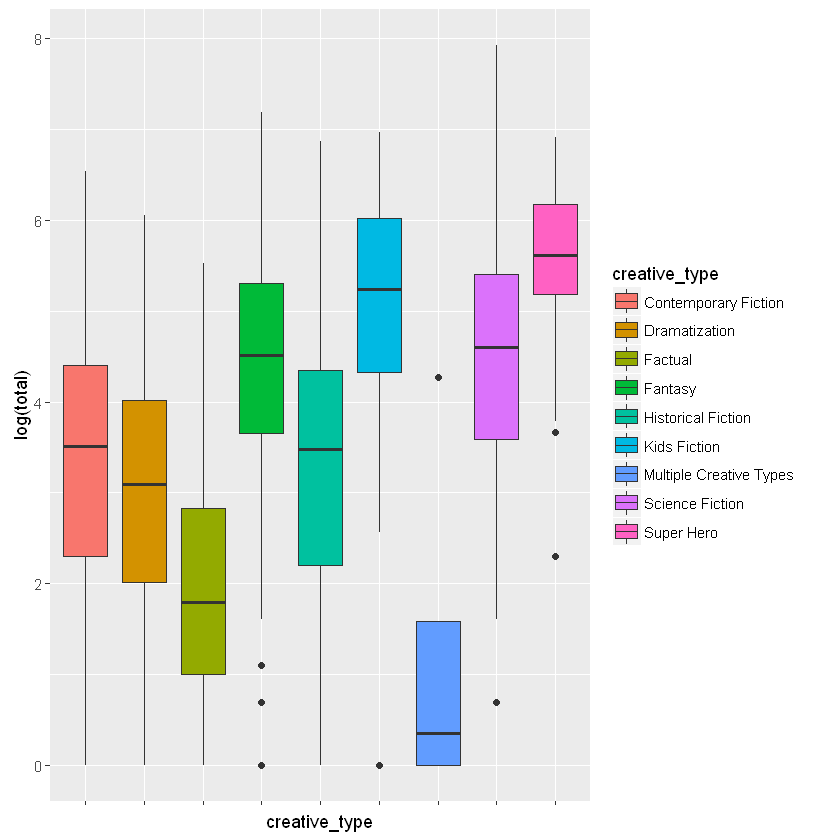

In [14]:
#Analyzing creative_type column with total along with frequencies

ggplot(data = mdata, aes(x = creative_type, y = log(total), fill = creative_type)) + geom_boxplot() +
theme(axis.text.x = element_blank())

table(mdata$creative_type)

In [15]:
# Kids fiction, science fiction and superhero movies seem to be doing good compared to others
# Multiple creative types is poor performing but that could be because of their low count
# Merging all of these into one and creating an additional flag for it

mdata$creative_type <- ifelse(mdata$creative_type %in% c("Kids Fiction", "Science Fiction", "Super Hero", 
                            "Multiple Creative Types"), "High_Performer", mdata$creative_type)

mdata$creative_type_flag <- ifelse(mdata$creative_type=="High_Performer",1,0)


       Based on Comic/Graphic Novel       Based on Factual Book/Article 
                                 36                                  23 
  Based on Fiction Book/Short Story Based on Folk Tale/Legend/Fairytale 
                                218                                  10 
                      Based on Game           Based on Musical or Opera 
                                  8                                   4 
                      Based on Play           Based on Real Life Events 
                                 21                                 128 
                Based on Short Film            Based on Theme Park Ride 
                                  4                                   2 
                       Based on Toy                         Based on TV 
                                  2                                  38 
                        Compilation                 Original Screenplay 
                                  3               

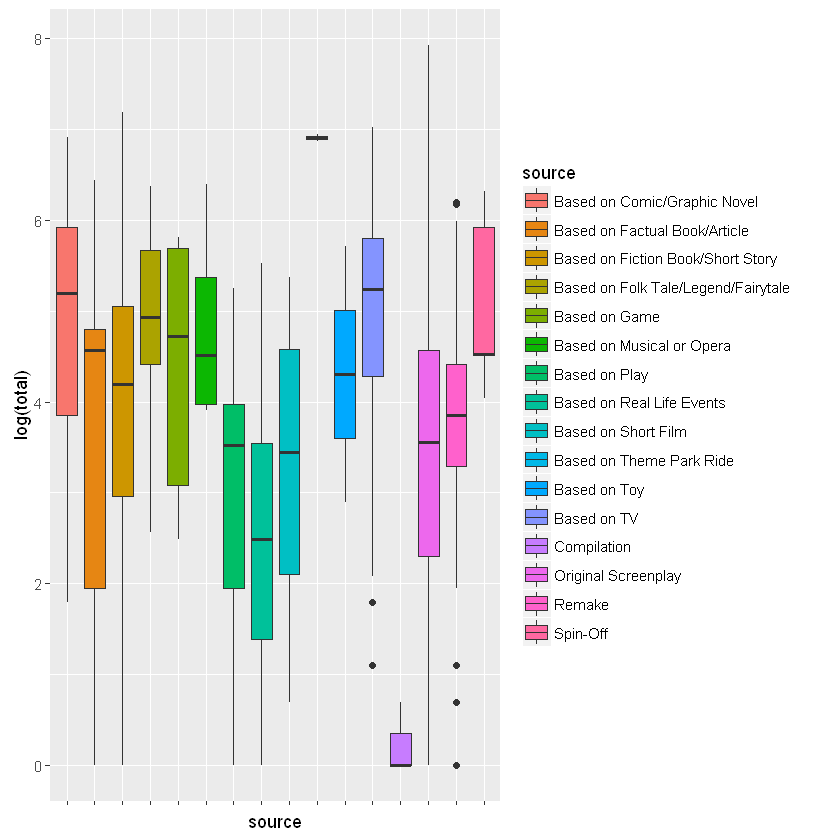

In [16]:
#Analyzing source in similar way
table(mdata$source)

ggplot(data = mdata, aes(x = source, y = log(total), fill = source)) + geom_boxplot() +
    theme(axis.text.x = element_blank())


In [17]:
#Some sources are vary low in frequency
#Combining those and creating a flag for it

mdata$source <- ifelse(mdata$source %in% c("Based on Folk Tale/Legend/Fairytale", "Based on Game", "Based on Musical or Opera", "Based on Short Film", 
  "Based on Theme Park Ride", "Based on Toy","Compilation", "Spin-Off"), "Combined", mdata$source)

mdata$source_lowfreq_flag <- ifelse(mdata$source=="Combined", 1, 0)

table(mdata$source)

table(mdata$source_lowfreq_flag)


     Based on Comic/Graphic Novel     Based on Factual Book/Article 
                               36                                23 
Based on Fiction Book/Short Story                     Based on Play 
                              218                                21 
        Based on Real Life Events                       Based on TV 
                              128                                38 
                         Combined               Original Screenplay 
                               38                               629 
                           Remake 
                               65 


   0    1 
1158   38 


      Animation/Live Action           Digital Animation 
                         36                          53 
             Hand Animation                 Live Action 
                          6                        1093 
Multiple Production Methods       Stop-Motion Animation 
                          3                           5 

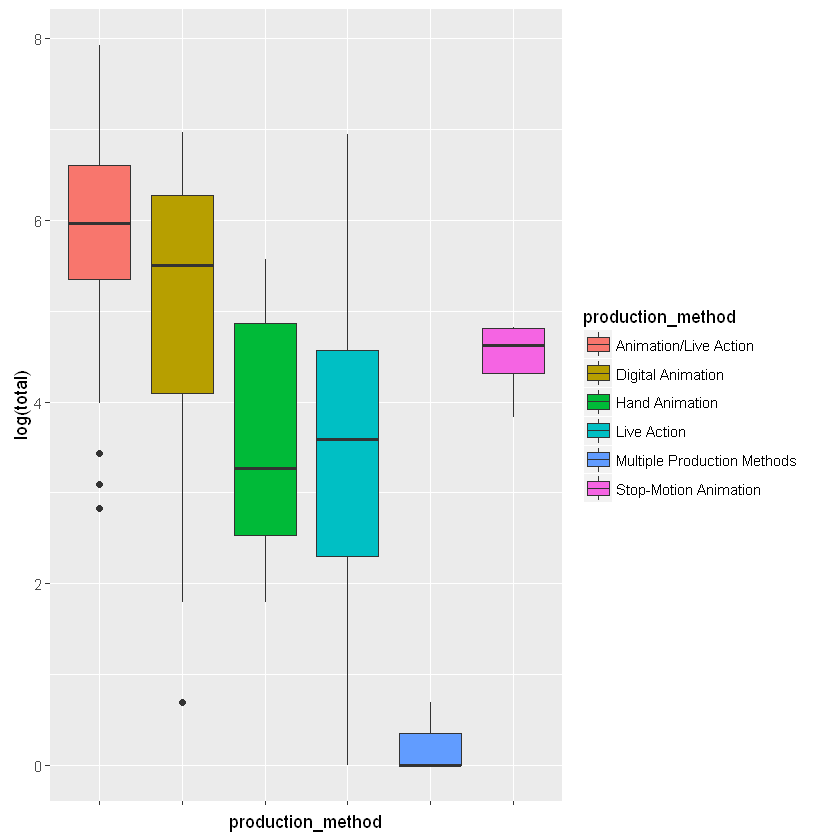

In [18]:
# Similar analysis for production method as well

ggplot(data = mdata, aes(x = production_method, y = log(total), fill = production_method)) + geom_boxplot() +
theme(axis.text.x = element_blank())
 
table(mdata$production_method)

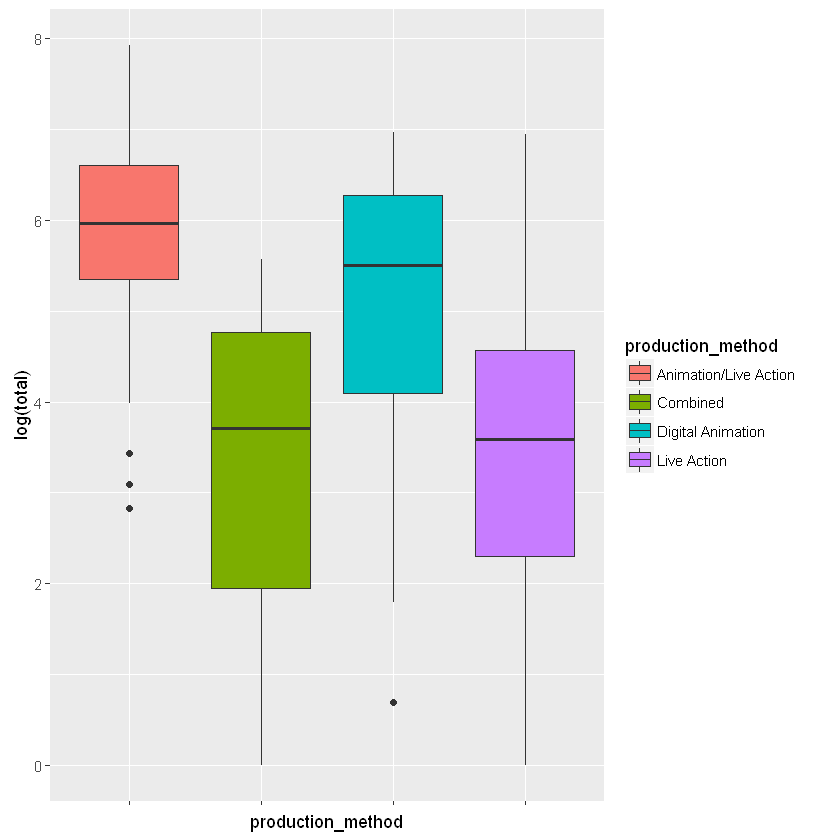

In [19]:
#Here also combining "Multiple production methods", "Stop motion animation" and "hand animation" because of low frequency

mdata$production_method <- ifelse(mdata$production_method %in% c("Hand Animation", 
    "Multiple Production Methods", "Stop-Motion Animation"), "Combined", mdata$production_method)

# Checking the boxplot again

ggplot(data = mdata, aes(x = production_method, y = log(total), fill = production_method)) + geom_boxplot() +
theme(axis.text.x = element_blank())

In [20]:
# Here "Animation/Live Action" and "Digital Animation" seem to be perforing well despite their comparatively low frequency

# Creating a flag to emphasize on this phenomena

mdata$production_method_flag <- ifelse(mdata$production_method %in% c("Digital Animation", "Animation/Live Action"), 1, 0)

table(mdata$production_method_flag)


   0    1 
1107   89 


             Action           Adventure        Black Comedy              Comedy 
                124                 107                  12                 260 
Concert/Performance         Documentary               Drama              Horror 
                  6                  54                 321                  74 
    Multiple Genres             Musical     Romantic Comedy   Thriller/Suspense 
                  9                  12                  80                 131 
            Western 
                  6 

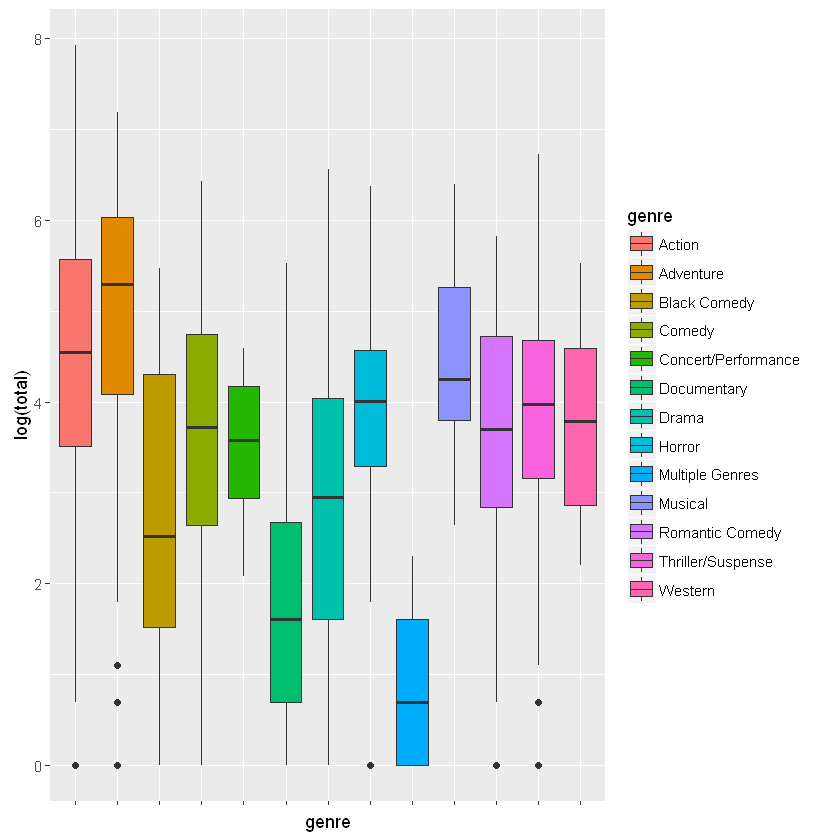

In [21]:
# Analysis for genre

ggplot(data = mdata, aes(x = genre, y = log(total), fill = genre)) + geom_boxplot() +
  theme(axis.text.x = element_blank())

table(mdata$genre)


           Action         Adventure          Combined            Comedy 
              124               107                45               260 
      Documentary             Drama            Horror   Romantic Comedy 
               54               321                74                80 
Thriller/Suspense 
              131 

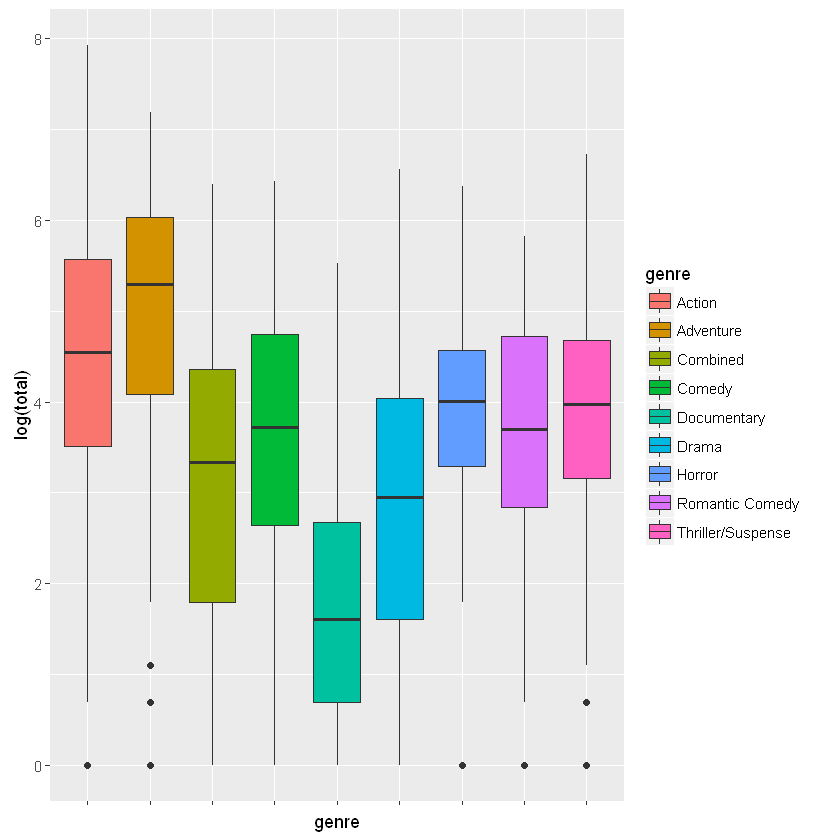

In [22]:
# Combining low frequency genre and again checking the same graph

mdata$genre <- ifelse(mdata$genre %in% c("Black Comedy", "Concert/Performance", "Multiple Genres", "Musical", "Western"), 
                     "Combined", mdata$genre)

ggplot(data = mdata, aes(x = genre, y = log(total), fill = genre)) + geom_boxplot() +
  theme(axis.text.x = element_blank())

table(mdata$genre)

In [23]:
# Here "Action" and "Adventure" are doing exceptionally good but documentaries are poor performing

# Creating seperate flags for these two

mdata$genre_action <- ifelse(mdata$genre %in% c("Action", "Adventure"), 1, 0)

mdata$genre_documentary <- ifelse(mdata$genre=="Documentary", 1, 0)


        G     NC-17 Not Rated        PG     PG-13         R 
       39         3        83       182       441       448 

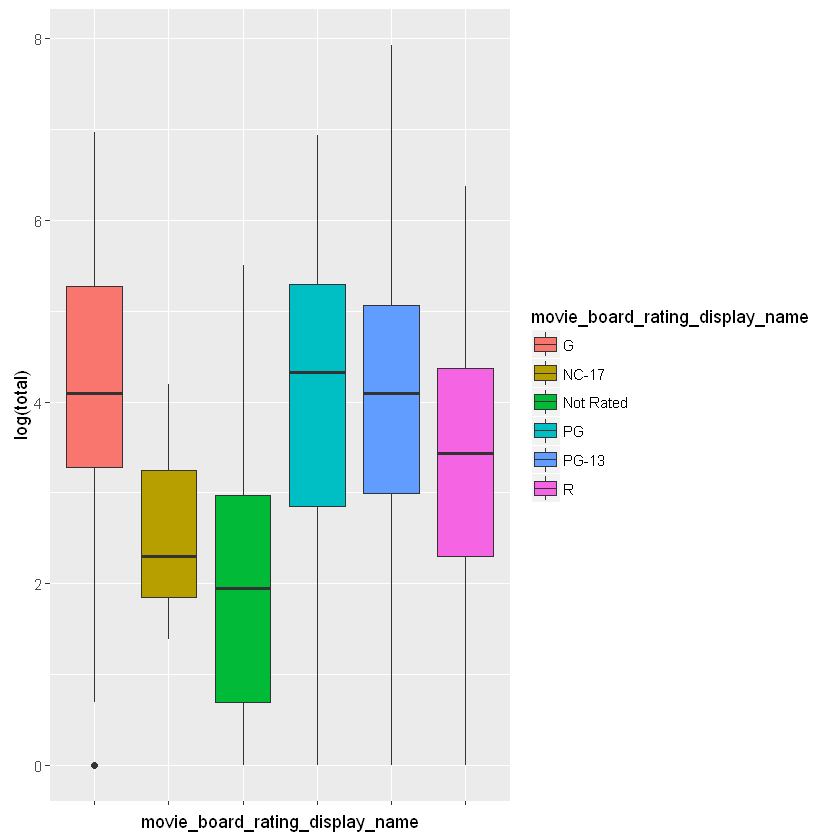

In [24]:
# Analysis for board_rating_display_name

ggplot(data = mdata, aes(x = movie_board_rating_display_name, y = log(total), fill = movie_board_rating_display_name)) + geom_boxplot() +
  theme(axis.text.x = element_blank())

table(mdata$movie_board_rating_display_name)


In [25]:
# Here NC-17 and Not Rated seem to be similar in nature in terms of their box-office performance

# Combining and creating a flag 

mdata$movie_board_rating_display_name <- ifelse(mdata$movie_board_rating_display_name %in% c("NC-17", "Not Rated"), 
                        "Combined", mdata$movie_board_rating_display_name)

mdata$movie_board_rating_display_name_flag <- ifelse(mdata$movie_board_rating_display_name=="Combined", 1, 0)


           Exclusive         Expands Wide                 IMAX 
                  30                   21                    3 
             Limited Oscar Qualifying Run   Special Engagement 
                 342                    3                    2 
                Wide 
                 795 

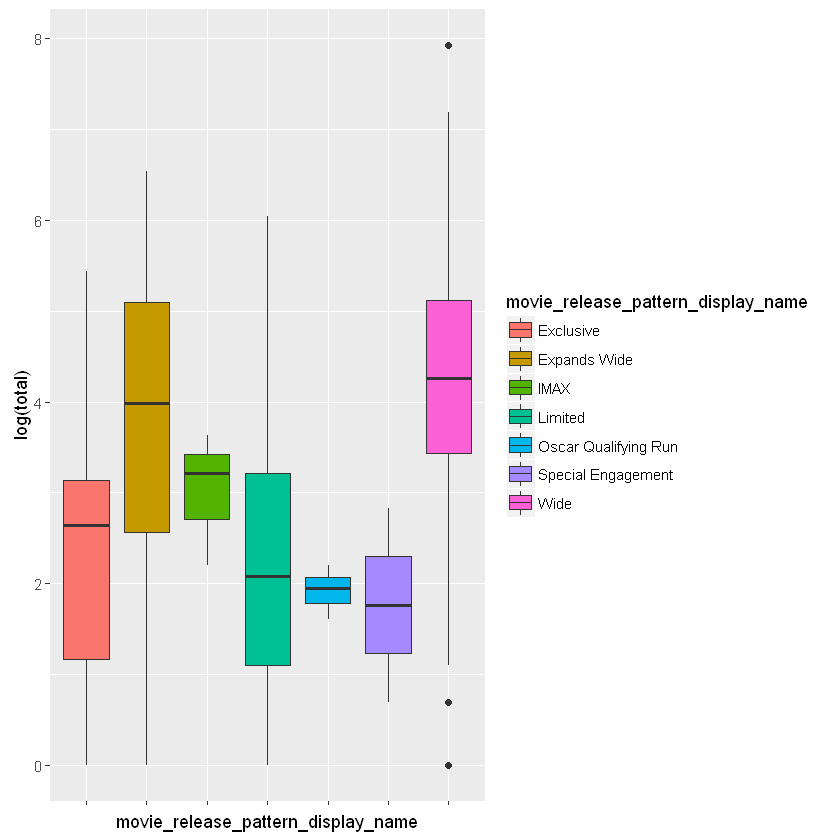

In [27]:
# Analyzing release pattern display name

ggplot(data = mdata, aes(x = movie_release_pattern_display_name, y = log(total), fill = movie_release_pattern_display_name)) + 
    geom_boxplot() + theme(axis.text.x = element_blank())

table(mdata$movie_release_pattern_display_name)



    Combined    Exclusive Expands Wide         Wide 
         350           30           21          795 

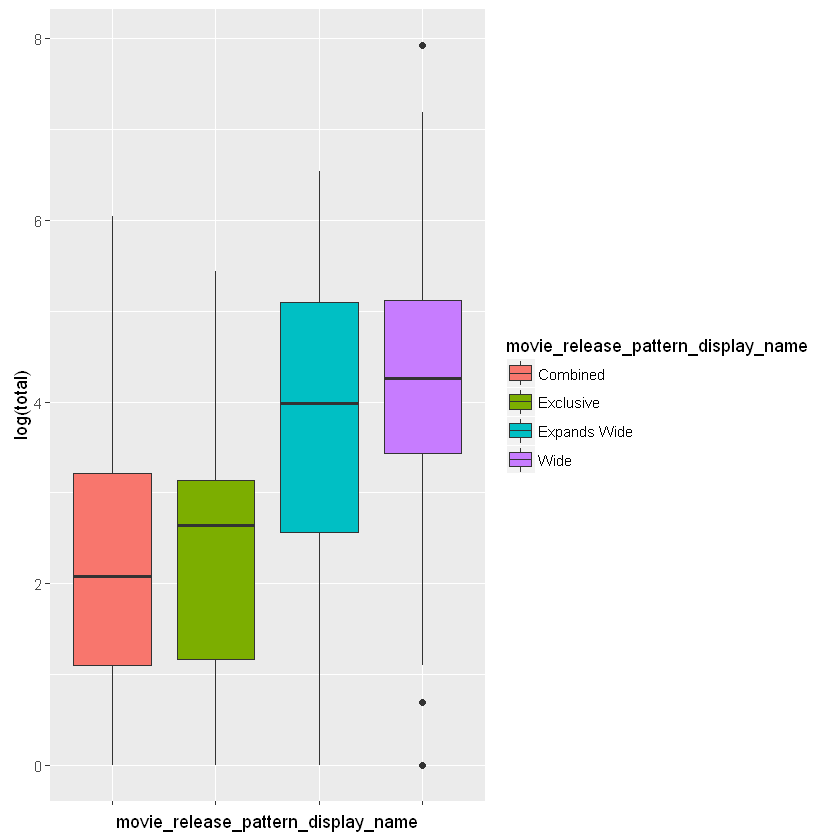

In [28]:
# Combining oscar_qualifying_run, imax, special engagemet with "Limited"

mdata$movie_release_pattern_display_name <- ifelse(mdata$movie_release_pattern_display_name %in% c("Oscar Qualifying Run", 
                            "Special Engagement", "IMAX", "Limited"), "Combined", mdata$movie_release_pattern_display_name)

ggplot(data = mdata, aes(x = movie_release_pattern_display_name, y = log(total), fill = movie_release_pattern_display_name)) + 
    geom_boxplot() + theme(axis.text.x = element_blank())

table(mdata$movie_release_pattern_display_name)

In [29]:
# Here wide films are doing better than others so making a flag for it

mdata$movie_release_pattern_display_name_flag <- ifelse(mdata$movie_release_pattern_display_name %in% c("Wide", "Expands Wide"), 1, 0)

table(mdata$movie_release_pattern_display_name_flag)


  0   1 
380 816 

In [48]:
# Analyzing language

table(mdata$language)


    Arabic     Danish    English      Farsi     French     German     Hebrew 
         1          1       1144          1         14          3          1 
     Hindi    Italian   Japanese  Norwegian     Polish Portuguese     Silent 
        16          1          2          1          1          1          1 
   Spanish    Swedish 
         6          2 

In [30]:
# Language is largely english driven, this variable is not going to help in the model

mdata$language <- NULL

# Checking class of each variable

sapply(mdata, class)

name                            display_name 
                            "character"                             "character" 
                        production_year                            movie_sequel 
                              "integer"                               "integer" 
                          creative_type                                  source 
                            "character"                             "character" 
                      production_method                                   genre 
                            "character"                             "character" 
                    board_rating_reason         movie_board_rating_display_name 
                            "character"                             "character" 
     movie_release_pattern_display_name                                   total 
                            "character"                               "integer" 
                               Category                      creative_type_flag 
                              "integer"                               "numeric" 
                    source_lowfreq_flag                  production_method_flag 
                              "numeric"                               "numeric" 
                           genre_action                       genre_documentary 
                              "numeric"                               "numeric" 
   movie_board_rating_display_name_flag movie_release_pattern_display_name_flag 
                              "numeric"                               "numeric"

In [34]:
#=================================================#
########## Feature Engineering ####################
#=================================================#

# After looking at the data, first thing that came to my mind was how long the name of the movies are. 
# I generally have the belief that movies with short and interesting name tend to do better than the movies with long names
# It is a good time to test this hypothesis

mdata$name_length <- sapply(mdata$display_name, function(x) nchar(x))
    
head(mdata[,c("display_name","name_length")])

,display_name,name_length
1,"10,000 B.C.",11
2,12 Rounds,9
3,1408,4
4,2010 Oscar Shorts,17
5,2012,4
6,21,2



	Pearson's product-moment correlation

data:  log(mdata$total) and mdata$name_length
t = 1.2765, df = 1194, p-value = 0.202
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01980865  0.09340575
sample estimates:
       cor 
0.03691701 


Warning message in cor.test.default(log(mdata$total), mdata$name_length, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  log(mdata$total) and mdata$name_length
S = 280320000, p-value = 0.5602
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.01686065 


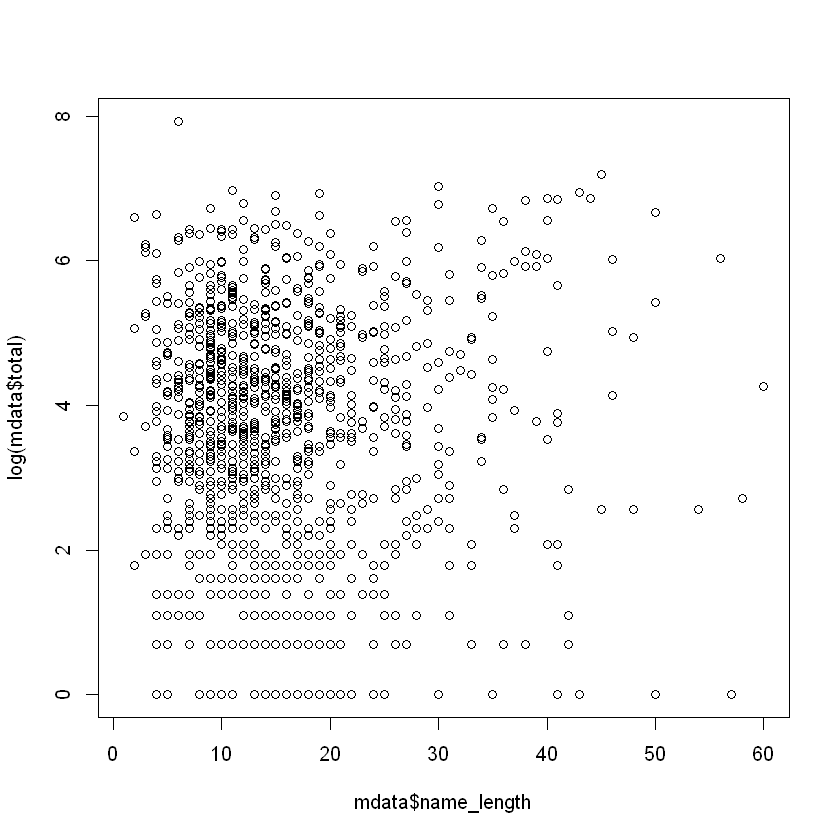

In [38]:
plot(log(mdata$total) ~ mdata$name_length)

cor.test(log(mdata$total), mdata$name_length)

cor.test(log(mdata$total), mdata$name_length, method = "spearman")


In [39]:
# Interestingly, my hypothesis does not seem to be correct
# Correlation values are not significant and also the scatter plot does not show any evidence of a linear relationship

# Dropping the new variable along with movie name columns

mdata$name_length <- NULL
mdata$display_name <- NULL
mdata$name <- NULL

In [ ]:
# Let's check the board rating reason column

head(mdata$board_rating_reason)

# The movie board seems to have used quite similar terms to explain a movie, these terms can be used as an input to our model 
# Doing text mining to identify most frequent terms

library(tm)
library(wordcloud)

corpus <- Corpus(VectorSource(mdata$board_rating_reason))

# Cleaning of corpus

corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeWords, c(stopwords("english")))
corpus <- tm_map(corpus, stripWhitespace)
corpus <- tm_map(corpus, stemDocument)
corpus <- tm_map(corpus, PlainTextDocument)

frequencies <- DocumentTermMatrix(corpus)
freq <- colSums(as.matrix(frequencies))

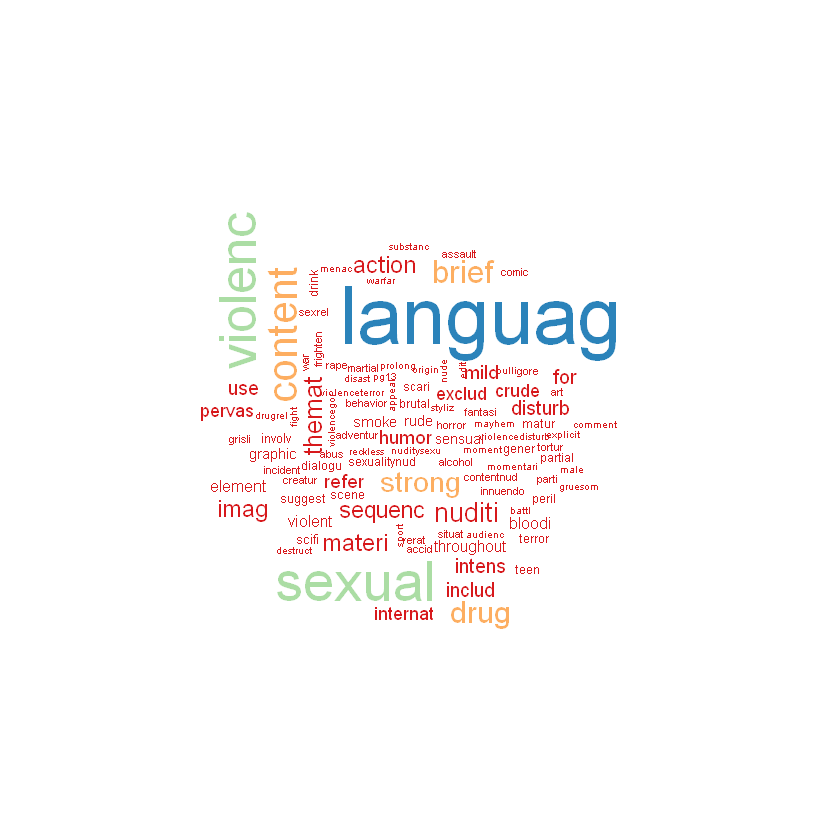

In [50]:
set.seed(7)
wordcloud(names(freq), freq, colors = brewer.pal(4, "Spectral"))

In [53]:
# As you can see, quite strong words have been used to give ratings to a movie
# This words would be good definitely be good predictors

# Keeping only top 10 most frequent words as predictors, more words may increase the predictive power but it also slow down the algorithm

freq <- freq[order(-freq)]

words <- names(head(freq, 10))

for(i in words) mdata[[i]] <- as.numeric(grepl(i, mdata$board_rating_reason))

In [56]:
names(mdata)
mdata$board_rating_reason <- NULL


[1] "production_year"                        
 [2] "movie_sequel"                           
 [3] "creative_type"                          
 [4] "source"                                 
 [5] "production_method"                      
 [6] "genre"                                  
 [7] "board_rating_reason"                    
 [8] "movie_board_rating_display_name"        
 [9] "movie_release_pattern_display_name"     
[10] "total"                                  
[11] "Category"                               
[12] "creative_type_flag"                     
[13] "source_lowfreq_flag"                    
[14] "production_method_flag"                 
[15] "genre_action"                           
[16] "genre_documentary"                      
[17] "movie_board_rating_display_name_flag"   
[18] "movie_release_pattern_display_name_flag"
[19] "languag"                                
[20] "sexual"                                 
[21] "violenc"                                
[22] "content"                                
[23] "brief"                                  
[24] "drug"                                   
[25] "strong"                                 
[26] "nuditi"                                 
[27] "themat"                                 
[28] "action"

In [57]:
# Converting character columns into factor
# Here none of them are ordinal in nature so levels do not matter

for(i in names(mdata)) if(is.character(mdata[[i]])) mdata[[i]] <- factor(mdata[[i]])

sapply(mdata, class)

production_year                            movie_sequel 
                              "integer"                               "integer" 
                          creative_type                                  source 
                               "factor"                                "factor" 
                      production_method                                   genre 
                               "factor"                                "factor" 
        movie_board_rating_display_name      movie_release_pattern_display_name 
                               "factor"                                "factor" 
                                  total                                Category 
                              "integer"                               "integer" 
                     creative_type_flag                     source_lowfreq_flag 
                              "numeric"                               "numeric" 
                 production_method_flag                            genre_action 
                              "numeric"                               "numeric" 
                      genre_documentary    movie_board_rating_display_name_flag 
                              "numeric"                               "numeric" 
movie_release_pattern_display_name_flag                                 languag 
                              "numeric"                               "numeric" 
                                 sexual                                 violenc 
                              "numeric"                               "numeric" 
                                content                                   brief 
                              "numeric"                               "numeric" 
                                   drug                                  strong 
                              "numeric"                               "numeric" 
                                 nuditi                                  themat 
                              "numeric"                               "numeric" 
                                 action 
                              "numeric"

In [58]:
# The final scoring file does not have total column
# So making multiple models first to predict total column

library(caret)
set.seed(10)

inTrain <- createDataPartition(y = mdata$total, times = 1, p = 0.75, list = FALSE)

training <- mdata[inTrain,]
testing <- mdata[-inTrain,]

#Linear model
set.seed(11)

lmfit1 <- lm(total ~ production_year + movie_sequel + creative_type + source + production_method +
             genre + movie_board_rating_display_name + movie_release_pattern_display_name , data = training[,-10])

RMSE(predict(lmfit1, testing), testing$total)

#Decision tree model
library(rpart)

treefit1 <- rpart(total ~., data = training[,-10]) 

RMSE(predict(treefit1, testing), testing$total)


Loading required package: lattice


[1] 126.7892

[1] 136.552

In [64]:
# Linear model and single tree model are close in predicting total values
# Let's see if using any boosting or bagging can improve the results

#library(xgboost)
#library(Matrix)
library(caret)
set.seed(14)
control <- trainControl(method="repeatedcv", number=10, repeats=3, allowParallel = TRUE)
tunegrid <- expand.grid(.mtry = 6)

rffit1 <- train(total ~., data = training[,-10], method = "rf", tuneGrid=tunegrid, trControl=control)

# please note that I have set the value of mtry at 6, this value was found seperately using grid search

RMSE(predict(rffit1, testing), testing$total)


[1] 121.9302

In [66]:
varImp(treefit1)

,Overall
action,0.291467
creative_type,0.2482029
creative_type_flag,0.1720904
genre,0.6645077
genre_action,0.3857375
languag,0.4678014
movie_board_rating_display_name,0.5813207
movie_release_pattern_display_name,0.115285
movie_release_pattern_display_name_flag,0.2317592
movie_sequel,0.5542492


In [67]:
# Our newly created word variables are not making any contribution to the overall model
# Also production_year has poor importance value

set.seed(15)
rffit2 <- train(total ~ action + creative_type + creative_type_flag + genre + genre_action + languag +
                movie_board_rating_display_name + movie_release_pattern_display_name + movie_release_pattern_display_name_flag +
                movie_sequel + production_method + production_method_flag + source, 
                data = training, method = "rf", tuneGrid=tunegrid, trControl=control)

RMSE(predict(rffit2, testing), testing$total)

[1] 121.0501

In [74]:
## Trying boosting
set.seed(16)
gbmfit1 <- train(total ~ action + creative_type + creative_type_flag + genre + genre_action + languag +
                movie_board_rating_display_name + movie_release_pattern_display_name + movie_release_pattern_display_name_flag +
                movie_sequel + production_method + production_method_flag + source, 
                data = training, method = "gbm", verbose = FALSE)

RMSE(predict(gbmfit1, testing), testing$total)

[1] 118.128

In [76]:
# GBM is giving the best performance out of all
# Let's tune the parameters of gbm to optimal values
set.seed(18)
grid <- expand.grid(n.trees = 1:500, interaction.depth = 1:10, shrinkage = 0.1, n.minobsinnode = 5)

ctrl <- trainControl(method = "repeatedcv", number = 3, repeats = 1)

gbmfit2 <- train(total ~ action + creative_type + creative_type_flag + genre + genre_action + languag +
                movie_board_rating_display_name + movie_release_pattern_display_name + movie_release_pattern_display_name_flag +
                movie_sequel + production_method + production_method_flag + source, 
                data = training, method = "gbm", verbose = FALSE, trControl = ctrl, tuneGrid = grid)

gbmfit2

In [ ]:
# Optimal parameters selected are : n.trees = 40 and interaction.depth = 6

RMSE(predict(gbmfit2, testing), testing$total)

In [79]:
# Here it cab be seen that tuning of the parameters did not yield better results than default ones
# Hence sticking with model of default parameters

# Replacing the original total column with model prediction
mdata$total <- predict(gbmfit1, mdata)


In [80]:
# Working with random forest algorithm for making final predictions on Category column which is our target variable

mdata$Category <- factor(mdata$Category, levels = c("1", "2", "3", "4", "5", "6", "7","8","9"))

set.seed(20)

inTrain <- createDataPartition(y = mdata$Category, times = 1, p = 0.75, list = FALSE)

training <- mdata[inTrain, ]
testing <- mdata[-inTrain, ]

control <- trainControl(method="repeatedcv", number=10, repeats=3, search="grid", allowParallel = TRUE)
tunegrid <- expand.grid(.mtry=c(1:15))

fit2 <- train(Category ~., data = mdata, method = "rf", tuneGrid=tunegrid, trControl=control)

confusionMatrix(predict(fit2, mdata), mdata$Category)

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8   9
         1 140  19  11   3   0   2   2   0   0
         2  20 210  23   6   8   5   2   1   0
         3   3  11 202  12  16  11   4   0   0
         4   5   5   3 180   6   5   1   1   0
         5   0   1   2   3  99   0   1   1   0
         6   0   0   0   0   0  55   0   0   0
         7   0   1   2   1   0   2  51   1   0
         8   0   0   2   1   3   0   0  34   0
         9   0   0   0   0   0   0   0   0  19

Overall Statistics
                                          
               Accuracy : 0.8278          
                 95% CI : (0.8051, 0.8488)
    No Information Rate : 0.2065          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7952          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivity    

In [83]:
fit2

Random Forest 

1196 samples
  26 predictor
   9 classes: '1', '2', '3', '4', '5', '6', '7', '8', '9' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 1076, 1077, 1075, 1077, 1077, 1075, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa     
   1    0.2522157  0.06492078
   2    0.2680302  0.11039829
   3    0.2775361  0.13054571
   4    0.2864907  0.14368271
   5    0.2875978  0.14700932
   6    0.2817815  0.14157189
   7    0.2781008  0.13763479
   8    0.2806330  0.14102110
   9    0.2792560  0.14039882
  10    0.2716502  0.13167902
  11    0.2725190  0.13275370
  12    0.2722685  0.13327891
  13    0.2661054  0.12594909
  14    0.2694468  0.13042045
  15    0.2725423  0.13435139

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 5. 